In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd

In [4]:
RELATIVE_FILE_PATH="results/output_lcadc_comp_single_stage_noise_v3.vcsv"

In [5]:
from pathlib import Path

In [6]:
filepath = Path(SIMULATION_OUTPUT)/RELATIVE_FILE_PATH

In [7]:
df = pd.read_csv(filepath, comment=';', header=None, 
                 names=["time_VOUT", "VOUT"])
df = df[["time_VOUT", "VOUT"]].copy()

In [8]:
df.head()

,time_VOUT,VOUT
0,0.000000e+00,0.0
1,5.000000e-07,0.0
2,5.549152e-07,0.0
3,6.308933e-07,0.0
4,7.059475e-07,0.0


In [9]:
import numpy as np

In [10]:
df["delayed"] = df["VOUT"].shift(periods=1, fill_value=0)

In [11]:
df.head()

,time_VOUT,VOUT,delayed
0,0.000000e+00,0.0,0.0
1,5.000000e-07,0.0,0.0
2,5.549152e-07,0.0,0.0
3,6.308933e-07,0.0,0.0
4,7.059475e-07,0.0,0.0


In [12]:
df["abs_diff"] = np.absolute(df["VOUT"] - df["delayed"])

In [13]:
df.head()

,time_VOUT,VOUT,delayed,abs_diff
0,0.000000e+00,0.0,0.0,0.0
1,5.000000e-07,0.0,0.0,0.0
2,5.549152e-07,0.0,0.0,0.0
3,6.308933e-07,0.0,0.0,0.0
4,7.059475e-07,0.0,0.0,0.0


In [14]:
ndf = df.loc[df["abs_diff"]!=0].copy()

In [15]:
ndf

,time_VOUT,VOUT,delayed,abs_diff
5095,0.000005,0.000002,0.000000,0.000002
5096,0.000005,0.000004,0.000002,0.000002
5097,0.000005,0.000007,0.000004,0.000003
5098,0.000005,0.000010,0.000007,0.000004
5099,0.000005,0.000014,0.000010,0.000004
...,...,...,...,...
3533967,0.007992,-0.424931,-0.424791,0.000141
3533968,0.007992,-0.425196,-0.424931,0.000264
3533969,0.007992,-0.425595,-0.425196,0.000399
3533970,0.007992,-0.426055,-0.425595,0.000460


In [16]:
ndf["time_diff"] = ndf["time_VOUT"].shift(periods=-1, fill_value=0) - ndf["time_VOUT"]

In [17]:
ndf

,time_VOUT,VOUT,delayed,abs_diff,time_diff
5095,0.000005,0.000002,0.000000,0.000002,3.751190e-12
5096,0.000005,0.000004,0.000002,0.000002,6.395883e-12
5097,0.000005,0.000007,0.000004,0.000003,7.589974e-12
5098,0.000005,0.000010,0.000007,0.000004,8.613331e-12
5099,0.000005,0.000014,0.000010,0.000004,3.785595e-12
...,...,...,...,...,...
3533967,0.007992,-0.424931,-0.424791,0.000141,2.819949e-10
3533968,0.007992,-0.425196,-0.424931,0.000264,4.259337e-10
3533969,0.007992,-0.425595,-0.425196,0.000399,4.907735e-10
3533970,0.007992,-0.426055,-0.425595,0.000460,5.412815e-10


In [18]:
sel_df = ndf.loc[ndf["time_diff"]>1e-8].copy()

In [19]:
sel_df

,time_VOUT,VOUT,delayed,abs_diff,time_diff
5327,0.000005,-0.004687,-0.004165,0.000523,5.038093e-07
7425,0.000006,-0.009375,-0.008896,0.000479,2.611981e-07
9147,0.000006,-0.014063,-0.013634,0.000429,2.174492e-06
11354,0.000008,-0.009375,-0.009670,0.000295,1.466202e-06
12635,0.000010,-0.004687,-0.004936,0.000248,1.447085e-06
...,...,...,...,...,...
3528986,0.007967,-0.403125,-0.402886,0.000239,4.061024e-06
3529922,0.007971,-0.407813,-0.407480,0.000333,4.515525e-06
3531047,0.007975,-0.412500,-0.412232,0.000268,4.791485e-06
3531902,0.007980,-0.417187,-0.416818,0.000370,5.751881e-06


In [20]:
nsel_df = sel_df[(sel_df["time_VOUT"]>1.04e-3) & (sel_df["time_VOUT"]<7.44e-3)]
nsel_df.head()

,time_VOUT,VOUT,delayed,abs_diff,time_diff
489180,0.001041,0.342187,0.341972,0.000215,0.000002
490165,0.001043,0.346875,0.346619,0.000256,0.000002
491148,0.001045,0.351562,0.351347,0.000216,0.000002
492231,0.001047,0.356250,0.355996,0.000254,0.000002
493174,0.001049,0.360938,0.360696,0.000241,0.000002


In [21]:
import matplotlib.pylab as plt

(array([1395.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1395.]),
 array([-0.0046875, -0.00375  , -0.0028125, -0.001875 , -0.0009375,
         0.       ,  0.0009375,  0.001875 ,  0.0028125,  0.00375  ,
         0.0046875]),
 <BarContainer object of 10 artists>)

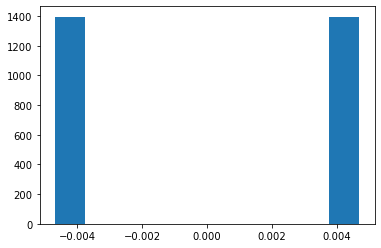

In [22]:
diff = nsel_df["VOUT"].shift(periods=-1, fill_value=0) - nsel_df["VOUT"]
diff = diff[:-1]
plt.hist(diff)

In [23]:
min(np.abs(diff))

0.004687499999999897

In [24]:
nsel_df["time_diff"].min()

1.3574374592003821e-06

In [25]:
fmax = 1/nsel_df["time_diff"].min()
fmax

736682.1898292569

In [26]:
import matplotlib.pylab as plt

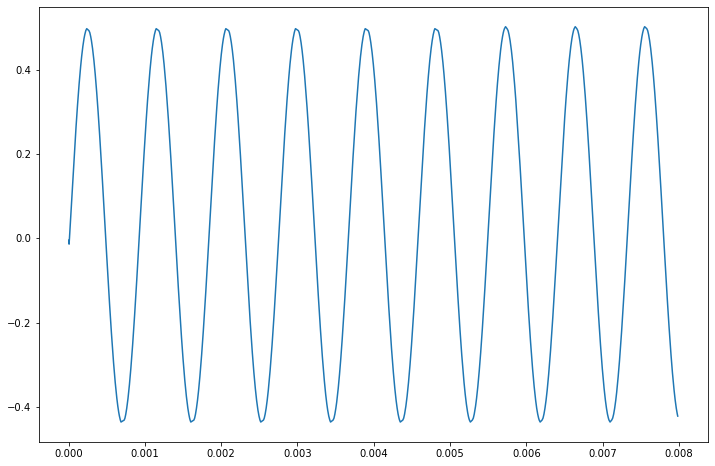

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(sel_df["time_VOUT"],sel_df["VOUT"],'-')

In [50]:
from eapprocessor.tools.resample import resample, decimate

In [51]:
fs = 20e3*128
x = np.arange(0.00104, 0.00744, 1/fs)
y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,3)

In [58]:
d_time,d_signal= decimate(x, y,16)
d_time,d_signal= decimate(d_time, d_signal,8)

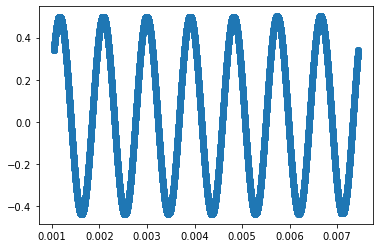

In [59]:
plt.plot(x,y,"-o")

In [60]:
from eapprocessor.tools.fft import fft

In [61]:
xf, yf = fft(np.array(y), fs)

In [62]:
xf, yf = fft(np.array(d_signal), fs)

In [63]:
def plot_spectrum_db(xf,yf,fs):
    fig= plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(xf,20*np.log10(np.abs(yf)),"--.")
    ax.grid()
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power density (dB)")
    ax.set_title(f"Spectrum at {fs}Hz sampling")

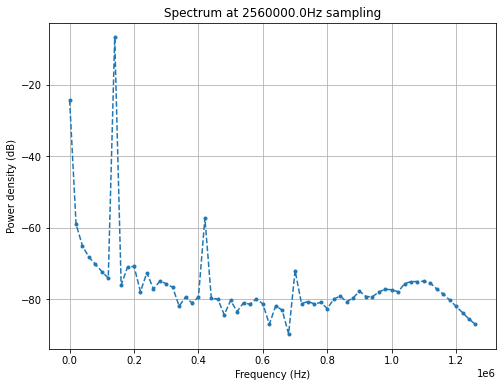

In [64]:
plot_spectrum_db(xf,yf,fs)

In [65]:
def calculate_snr(yf):
    peak_index = np.argmax(yf)
    noise = np.delete(yf,[0, peak_index],None)
    pw_signal = yf[peak_index]**2
    pw_noise = np.sum(np.power(noise, 2))
    return 10*np.log10(pw_signal/pw_noise)

In [66]:
def calculate_enob(snr):
    return (snr -1.76)/6.02

In [67]:
calculate_snr(yf)

46.548519266440984

In [68]:
calculate_enob(calculate_snr(yf))

7.439953366518437

In [40]:
import itertools
import pandas as pd
from pathlib import Path

In [78]:
#Defining parameters
kind_interpolator=[1,3,5]
fs=[20e3,40e3,100e3]
t_start=[0.00104]
t_stop=[0.00744]


In [79]:
args = [list(x) for x in itertools.product(fs,kind_interpolator, t_start, t_stop)]
args

[[20000.0, 1, 0.00104, 0.00744],
 [20000.0, 3, 0.00104, 0.00744],
 [20000.0, 5, 0.00104, 0.00744],
 [40000.0, 1, 0.00104, 0.00744],
 [40000.0, 3, 0.00104, 0.00744],
 [40000.0, 5, 0.00104, 0.00744],
 [100000.0, 1, 0.00104, 0.00744],
 [100000.0, 3, 0.00104, 0.00744],
 [100000.0, 5, 0.00104, 0.00744]]

In [80]:
def evaluate_parameters(*args):
    x = np.arange(args[2], args[3], 1/args[0])
    y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,args[1])
    xf, yf = fft(np.array(y), args[0])
    snr = calculate_snr(yf)
    enob = calculate_enob(snr)
    return {
        "time": x,
        "interpolated":y,
        "xf":xf,
        "yf":yf,
        "snr": snr,
        "enob": enob
    }

In [81]:
rows = [ x + [evaluate_parameters(*x)] for x in args]

In [82]:
df = pd.DataFrame(rows, columns=['fs', 'order_interpolator', 't_start', 't_stop','result'])
df

,fs,order_interpolator,t_start,t_stop,result
0,20000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
1,20000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
2,20000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
3,40000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
4,40000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
5,40000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
6,100000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
7,100000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
8,100000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."


In [83]:
ndf = pd.DataFrame(df["result"].to_list(), index=df.index)
df[ndf.columns] = ndf
df.drop(columns=["result"], inplace=True)
df

,fs,order_interpolator,t_start,t_stop,time,interpolated,xf,yf,snr,enob
0,20000.0,1,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.3390920409723496, 0.43986394272415585, 0.49...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06268988904926495, 0.0011588850318710387, 0...",47.237217,7.554355
1,20000.0,3,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.3391210107384248, 0.4398728893574509, 0.493...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06269743463148894, 0.0011349046448480948, 0...",47.254551,7.557234
2,20000.0,5,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.3391336172683852, 0.4398756877339224, 0.493...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06270452406164224, 0.0011343745506633323, 0...",47.254237,7.557182
3,40000.0,1,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.3390920409723496, 0.39466160185233756, 0.43...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06266896955962391, 0.0011391381122582093, 0...",47.177163,7.544379
4,40000.0,3,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.3391210107384248, 0.3946473023314257, 0.439...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06269564806236098, 0.0011334796425450802, 0...",47.262942,7.558628
5,40000.0,5,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.3391336172683852, 0.3946430668536895, 0.439...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06269354688962137, 0.0011286253777035985, 0...",47.248539,7.556236
6,100000.0,1,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.3390920409723496, 0.3625233058648774, 0.384...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06267343524954515, 0.0011488027328614935, 0...",47.171922,7.543509
7,100000.0,3,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.3391210107384248, 0.3625173507488819, 0.384...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06270776027746652, 0.001147169216357758, 0....",47.265298,7.559020
8,100000.0,5,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.3391336172683852, 0.36251414052893566, 0.38...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06270685677672867, 0.001142558104167442, 0....",47.233115,7.553674


In [84]:
df.drop(columns=["xf","yf", "interpolated", "time"])

,fs,order_interpolator,t_start,t_stop,snr,enob
0,20000.0,1,0.00104,0.00744,47.237217,7.554355
1,20000.0,3,0.00104,0.00744,47.254551,7.557234
2,20000.0,5,0.00104,0.00744,47.254237,7.557182
3,40000.0,1,0.00104,0.00744,47.177163,7.544379
4,40000.0,3,0.00104,0.00744,47.262942,7.558628
5,40000.0,5,0.00104,0.00744,47.248539,7.556236
6,100000.0,1,0.00104,0.00744,47.171922,7.543509
7,100000.0,3,0.00104,0.00744,47.265298,7.559020
8,100000.0,5,0.00104,0.00744,47.233115,7.553674


In [85]:
enob = df.loc[df["order_interpolator"]==3, "enob"].mean()
enob

7.558294092784688

In [86]:
power = 3.30e-6
fom = power/(40e3*(2**enob))
fom

4.377041966305227e-13

## Evaluation for multiple results

In [1]:
!ls /mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results

output_lcadc_comp_differential_level_shifter.vcsv
output_lcadc_comp_differential_mirror.vcsv
output_lcadc_comp_hysteresis_mixed.vcsv
output_lcadc_comp_hysteresis.vcsv
output_lcadc_comp_single_stage_noise_v2.vcsv
output_lcadc_comp_single_stage_noise_v3.vcsv
output_lcadc_comp_single_stage_noise_v4.vcsv
output_lcadc_comp_single_stage_noise.vcsv
output_lcadc_comp_single_stage.vcsv
output_lcadc_v2.vcsv
output_lcadc.vcsv
output_sar.vcsv
simulation_dac_cm_differential_var_0.grf
simulation_dac_cm_differential_var_1.grf
simulation_dac_cm_differential_var.grf.group
simulation_sar_cm_1f_0.grf
simulation_sar_cm_1f_1.grf
simulation_sar_cm_1f.grf.group
simulation_sar_cm_20f_1_1_0.grf
simulation_sar_cm_20f_1_1_1.grf
simulation_sar_cm_20f_1_1.grf.group


In [2]:
BASE_FOLDER="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results"

In [47]:
files = [
    "output_lcadc_v2.vcsv",
    "output_lcadc_comp_single_stage_noise_v3.vcsv",
    "output_lcadc_comp_differential_level_shifter.vcsv",
    "output_lcadc_comp_hysteresis.vcsv",
    "output_lcadc_comp_hysteresis_mixed.vcsv"
]
comp1=[
    "Three stage",
    "A-class amplifier",
    "Level shifter",
    "Hysteresis",
    "A-class amplifier"
]
comp2=[
    "Three stage",
    "A-class amplifier",
    "Level shifter",
    "Hysteresis",
    "Hysteresis"
]
map_files_to_comp1 = dict(zip(files,comp1))
map_files_to_comp2 = dict(zip(files,comp2))

In [25]:
import itertools
import pandas as pd
from pathlib import Path
import numpy as np

In [26]:
files = [ Path(BASE_FOLDER) / file for file in files]

In [32]:
from eapprocessor.cadence.parse import parse_lcadc
from eapprocessor.tools.fft import fft
from eapprocessor.tools.resample import resample
from eapprocessor.tools.metrics import calculate_enob, calculate_snr

In [33]:
#Defining parameters
kind_interpolator=[1,3]
fs=[20e3,40e3,100e3]
t_start=[0.00104]
t_stop=[0.00744]

In [34]:
def evaluate_parameters(*args):
    x = np.arange(args[3], args[4], 1/args[1])
    time, voltage = parse_lcadc(args[0])
    y = resample(time, voltage,x,args[2])
    xf, yf = fft(np.array(y), args[1])
    snr = calculate_snr(yf)
    enob = calculate_enob(snr)
    return {
        "time": x,
        "interpolated":y,
        "xf":xf,
        "yf":yf,
        "snr": snr,
        "enob": enob
    }

In [35]:
args = [list(x) for x in itertools.product(files,fs,kind_interpolator, t_start, t_stop)]

In [36]:
rows = [ x + [evaluate_parameters(*x)] for x in args]

In [41]:
df = pd.DataFrame(rows, columns=['filename','fs', 'order_interpolator', 't_start', 't_stop','result'])

In [42]:
ndf = pd.DataFrame(df["result"].to_list(), index=df.index)
df[ndf.columns] = ndf
df.drop(columns=["result"], inplace=True)

In [52]:
df["file"]=df["filename"].apply(lambda x: Path(x).name)
df["Comp1"]=df["file"].map(map_files_to_comp1)
df["Comp2"]=df["file"].map(map_files_to_comp2)

In [58]:
df[["Comp1","Comp2","fs","order_interpolator","t_start","t_stop","snr","enob"]]

,Comp1,Comp2,fs,order_interpolator,t_start,t_stop,snr,enob
0,Three stage,Three stage,20000.0,1,0.00104,0.00744,46.520169,7.435244
1,Three stage,Three stage,20000.0,3,0.00104,0.00744,46.468178,7.426608
2,Three stage,Three stage,40000.0,1,0.00104,0.00744,46.544109,7.439221
3,Three stage,Three stage,40000.0,3,0.00104,0.00744,46.492331,7.430620
4,Three stage,Three stage,100000.0,1,0.00104,0.00744,46.527168,7.436407
5,Three stage,Three stage,100000.0,3,0.00104,0.00744,46.476187,7.427938
6,A-class amplifier,A-class amplifier,20000.0,1,0.00104,0.00744,47.237217,7.554355
7,A-class amplifier,A-class amplifier,20000.0,3,0.00104,0.00744,47.254551,7.557234
8,A-class amplifier,A-class amplifier,40000.0,1,0.00104,0.00744,47.177163,7.544379
9,A-class amplifier,A-class amplifier,40000.0,3,0.00104,0.00744,47.262942,7.558628


In [66]:
text=df.to_latex(columns=["Comp1","Comp2","fs","order_interpolator","snr","enob"],index=False)

/tmp/ipykernel_7504/963502308.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  text=df.to_latex(columns=["Comp1","Comp2","fs","order_interpolator","snr","enob"],index=False)


In [67]:
print(text)

\begin{tabular}{llrrrr}
\toprule
            Comp1 &             Comp2 &       fs &  order\_interpolator &       snr &     enob \\
\midrule
      Three stage &       Three stage &  20000.0 &                   1 & 46.520169 & 7.435244 \\
      Three stage &       Three stage &  20000.0 &                   3 & 46.468178 & 7.426608 \\
      Three stage &       Three stage &  40000.0 &                   1 & 46.544109 & 7.439221 \\
      Three stage &       Three stage &  40000.0 &                   3 & 46.492331 & 7.430620 \\
      Three stage &       Three stage & 100000.0 &                   1 & 46.527168 & 7.436407 \\
      Three stage &       Three stage & 100000.0 &                   3 & 46.476187 & 7.427938 \\
A-class amplifier & A-class amplifier &  20000.0 &                   1 & 47.237217 & 7.554355 \\
A-class amplifier & A-class amplifier &  20000.0 &                   3 & 47.254551 & 7.557234 \\
A-class amplifier & A-class amplifier &  40000.0 &                   1 & 47.177163 &